In [182]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
data = sklearn.datasets.load_iris()
type(data)

sklearn.utils._bunch.Bunch

In [183]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [184]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
#df.insert(df.shape[1], "target", data.target, True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [185]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [186]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

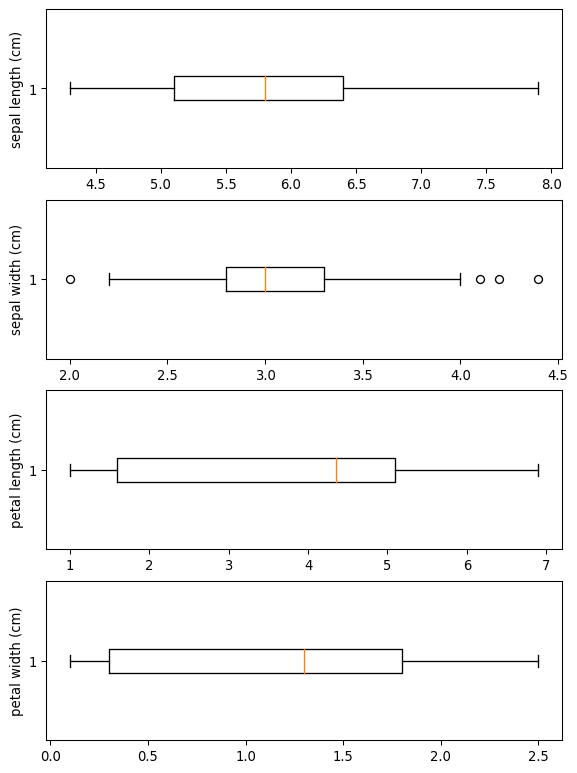

In [187]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [188]:
# Set a threshold for outliers (e.g., 2 standard deviations)
threshold = 2

# Initialize an empty DataFrame to store outlier flags for each feature
outliers = pd.DataFrame()

# Calculate Z-scores and detect outliers for each feature
for column in df.columns:
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_flags = (z_scores > threshold) | (z_scores < -threshold)
    outliers[column] = outlier_flags

# Access rows with outliers in specific columns
outlier_rows = df[outliers.any(axis=1)]


outlier_rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
131,7.9,3.8,6.4,2.0


In [195]:
def NormalizeData(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data)) * np.pi

normalized_df= df.apply(NormalizeData)
normalized_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.698132,1.963495,0.212989,0.130900
1,0.523599,1.308997,0.212989,0.130900
2,0.349066,1.570796,0.159742,0.130900
3,0.261799,1.439897,0.266237,0.130900
4,0.610865,2.094395,0.212989,0.130900
...,...,...,...,...
145,2.094395,1.308997,2.236388,2.879793
146,1.745329,0.654498,2.129893,2.356194
147,1.919862,1.308997,2.236388,2.487094
148,1.658063,1.832596,2.342883,2.879793


In [196]:
normalized_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,1.346812,1.384046,1.468561,1.439024
std,0.722624,0.570548,0.939974,0.997767
min,0.000000,0.000000,0.000000,0.000000
25%,0.698132,1.047198,0.319484,0.261799
50%,1.308997,1.308997,1.783786,1.570796
75%,1.832596,1.701696,2.183141,2.225295
max,3.141593,3.141593,3.141593,3.141593


In [199]:
NUM_FEATURES = df.shape[1]
angleEncoding = QuantumCircuit(NUM_FEATURES)

#Vector for encoding the features
ip = ParameterVector('Features',num_features) 

for i in range(num_features):
    encoder2.rz(ip[i], i)

encoder2.draw('mpl')

NameError: name 'ParameterVector' is not defined

In [200]:
X = normalized_df
y = pd.DataFrame(data.target, columns=["target"])
x_train, x_test, y_train, y_test = train_test_split(X, y)
display(x_train, x_test, y_train, y_test)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,1.221730,3.141593,0.266237,0.392699
92,1.308997,0.785398,1.597420,1.439897
53,1.047198,0.392699,1.597420,1.570796
91,1.570796,1.308997,1.916904,1.701696
2,0.349066,1.570796,0.159742,0.130900
...,...,...,...,...
89,1.047198,0.654498,1.597420,1.570796
10,0.959931,2.225295,0.266237,0.130900
55,1.221730,1.047198,1.863657,1.570796
94,1.134464,0.916298,1.703915,1.570796


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
44,0.698132,2.356194,0.479226,0.392699
25,0.610865,1.308997,0.319484,0.130900
11,0.436332,1.832596,0.319484,0.130900
108,2.094395,0.654498,2.555872,2.225295
146,1.745329,0.654498,2.129893,2.356194
86,2.094395,1.439897,1.970151,1.832596
61,1.396263,1.308997,1.703915,1.832596
58,2.007129,1.178097,1.916904,1.570796
57,0.523599,0.523599,1.224689,1.178097
72,1.745329,0.654498,2.076646,1.832596


,target
15,0
92,1
53,1
91,1
2,0
...,...
89,1
10,0
55,1
94,1


,target
44,0
25,0
11,0
108,2
146,2
86,1
61,1
58,1
57,1
72,1


In [201]:
import numpy as np

def approximate_gradient(predictions, targets, loss_function = log_loss, epsilon=1e-6):
    """
    Approximate gradient of a loss function at the input predictions.

    Parameters:
    - loss_function: A function that takes a predictions as input and returns a scalar loss.
    - predictions: The predictions at which to compute the gradient.
    - epsilon: A small value to compute finite differences (default is 1e-6).

    Returns:
    - gradient: An approximate gradient predictions of the same shape as the input predictions.
    """
    predictions = np.asarray(predictions)
    gradient = np.zeros_like(predictions)
    
    for i in range(len(predictions)):
        predictions_plus = np.copy(predictions)
        predictions_minus = np.copy(predictions)

        # Perturb the predictions by adding and subtracting epsilon to the i-th component
        predictions_plus[i] += epsilon
        predictions_minus[i] -= epsilon

        # Calculate the loss for the perturbed predictionss
        loss1 = loss_function(targets, predictions_plus)
        loss2 = loss_function(targets, predictions_minus)

        # Calculate the finite difference for the i-th component
        gradient[i] = (loss1 - loss2) / (2 * epsilon)

    return gradient


ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_2), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])


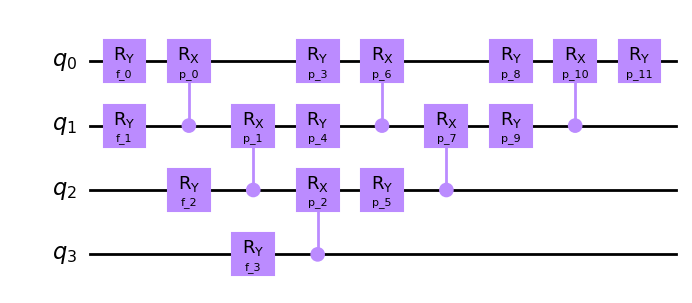

In [306]:
import numpy as np
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.circuit.library import CRXGate
from qiskit.circuit import Parameter

# Create a 4-qubit quantum circuit
n_qubits = 4
qc = QuantumCircuit(n_qubits)

# Define the input feature vector
features = [Parameter(f'f_{i}') for i in range(n_qubits)]

params = [Parameter(f'p_{i}') for i in range((n_qubits-1)**2+(n_qubits-1))]

for i in range(n_qubits):
        qc.ry(features[i], i)
k=0
for j in range(n_qubits):
    # Add parameterized quantum convolution layers
    for i in range(n_qubits - 1 - j):
        qc.crx(params[k], i + 1, i)
        k+=1
        
        
    # Encode the input features into the quantum circuit
    for i in range(n_qubits-1-j):
        qc.ry(params[k], i)
        k+=1

print(qc.parameters)
qc.draw('mpl', justify='right')

In [307]:
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

def bind_parameters_to_circuit(qc, params, values):
    # Check if the number of parameters matches the number of values
    if len(params) != len(values):
        raise ValueError("The number of parameters must match the number of values.")

    # Create a parameter binding dictionary
    parameter_binding = {param: value for param, value in zip(params, values)}

    # Bind parameters to the circuit
    bound_circuit = qc.bind_parameters(parameter_binding)

    return bound_circuit

In [308]:
def loss_function(qnn, input_data, target_data):
    # Perform forward pass to obtain predictions
    predictions = predict(qnn, input_data)

    # Compute the loss (e.g., mean squared error)
    loss = log_loss(predictions, target_data)

    return loss

In [309]:
def bind_parameter_values(qnn, input_sample):
    params = input_sample + [0.1]*12
    print(params)
    print(qnn.parameters)
    qnn.assign_parameters(params, inplace = True)

In [310]:
# Define a prediction function that runs the QNN
def predict(qnn, input_data):
    # Apply the input data to the QNN
    predictions = []
    for input_sample in input_data:
        bind_parameter_values(qnn, input_sample)
        backend = Aer.get_backend('qasm_simulator')
        job = backend.run(qnn.decompose(reps=6))
        result = job.result()
        print("ho")# Process the measurement results and obtain predictions
        prediction = process_measurement_results(result)
        predictions.append(prediction)
    return predictions

In [311]:
# Define a function to update parameters
def update_parameters(qnn, loss_gradient, learning_rate):
    # Iterate through QNN parameters
    for i, param in enumerate(qnn.parameters):
        new_param_value = param - learning_rate * loss_gradient[i]
        qnn.data[param] = new_param_value


In [312]:
# Main training loop
input_data = x_train.values.tolist()
target_data = y_train.values.tolist()
print(qc.parameters)
qnn = qc
print(qnn.parameters)
num_epochs=2
for epoch in range(num_epochs):
    total_loss = 0
    for input_sample, target in zip(input_data, target_data):
        # Forward pass
        predictions = predict(qnn, [input_sample])

        # Compute the loss gradient (you need to implement this)
        loss_gradient = compute_loss_gradient(predictions, target)

        # Update QNN parameters
        update_parameters(qnn, loss_gradient, learning_rate)

        # Accumulate the loss
        total_loss += loss_function(qnn, [input_sample], [target])

    avg_loss = total_loss / len(input_data)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")


ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_2), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])
ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_2), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])
[1.2217304763960308, 3.141592653589793, 0.26623666555845704, 0.39269908169872425, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_2), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])
ho


NameError: name 'process_measurement_results' is not defined